In [27]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [28]:
data_dir = 'dataset'

In [29]:
img_height = 224
img_width = 224
batch_size = 32

In [30]:
class_names = ['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Normal', 'Plaque', 'Pustular']
num_classes = len(class_names)

In [31]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])  # Adjusted to the new size
    image /= 255.0  # Normalize to [0,1]
    return image, label

In [32]:
def get_image_paths_and_labels(data_dir):
    image_paths = []
    labels = []
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        class_image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith(('.jpg', '.jpeg'))]
        image_paths += class_image_paths
        labels += [label] * len(class_image_paths)
    return image_paths, labels

In [33]:
image_paths, labels = get_image_paths_and_labels(data_dir)
image_paths_train, image_paths_val, labels_train, labels_val = train_test_split(image_paths, labels, test_size=0.2, random_state=123)

In [34]:
train_ds = tf.data.Dataset.from_tensor_slices((image_paths_train, labels_train))
val_ds = tf.data.Dataset.from_tensor_slices((image_paths_val, labels_val))

In [35]:
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [36]:
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [37]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
99/99 [==============================] - 4s 38ms/step - loss: 1.7759 - accuracy: 0.2892 - val_loss: 1.8039 - val_accuracy: 0.3075
Epoch 2/10
99/99 [==============================] - 3s 33ms/step - loss: 1.5842 - accuracy: 0.3734 - val_loss: 1.6390 - val_accuracy: 0.3558
Epoch 3/10
99/99 [==============================] - 3s 33ms/step - loss: 1.3864 - accuracy: 0.4496 - val_loss: 1.6555 - val_accuracy: 0.3609
Epoch 4/10
99/99 [==============================] - 3s 32ms/step - loss: 1.1462 - accuracy: 0.5659 - val_loss: 1.8271 - val_accuracy: 0.3774
Epoch 5/10
99/99 [==============================] - 3s 33ms/step - loss: 0.9395 - accuracy: 0.6581 - val_loss: 2.2733 - val_accuracy: 0.3355
Epoch 6/10
99/99 [==============================] - 3s 33ms/step - loss: 0.7936 - accuracy: 0.7232 - val_loss: 2.2195 - val_accuracy: 0.3558
Epoch 7/10
99/99 [==============================] - 3s 32ms/step - loss: 0.6328 - accuracy: 0.7715 - val_loss: 2.7802 - val_accuracy: 0.3342
Epoch 8/10
99

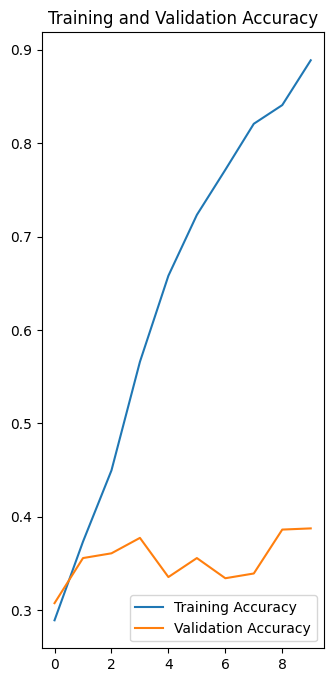

In [41]:
import matplotlib.pyplot as plt

# Retrieve the history of the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(10)  

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = 'dataset/Erythrodermic/aabpuwdngp.jpg'

def load_and_preprocess_image(image_path, img_height=224, img_width=224):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Preprocess the image
preprocessed_img = load_and_preprocess_image(image_path)


In [43]:
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 394ms/step


In [44]:
class_name = class_names[predicted_class[0]]
print(f"The image belongs to class: {class_name}")

The image belongs to class: Inverse


In [45]:
loss, accuracy = model.evaluate(val_ds)
print(f"Test accuracy: {accuracy*100:.2f}%")

25/25 [==============================] - 1s 19ms/step - loss: 3.4133 - accuracy: 0.3875
Test accuracy: 38.75%


Doing Adjustments

In [1]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'dataset'

In [3]:
img_height = 224
img_width = 224
batch_size = 32

In [4]:
class_names = ['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Normal', 'Plaque', 'Pustular']
num_classes = len(class_names)

In [5]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [6]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = data_augmentation(image)  # Apply data augmentation
    image /= 255.0  # Normalize to [0,1]
    return image, label

In [7]:
def get_image_paths_and_labels(data_dir):
    image_paths = []
    labels = []
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        class_image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith(('.jpg', '.jpeg', '.png'))]
        image_paths += class_image_paths
        labels += [label] * len(class_image_paths)
    return image_paths, labels

In [8]:
image_paths, labels = get_image_paths_and_labels(data_dir)
image_paths_train, image_paths_val, labels_train, labels_val = train_test_split(image_paths, labels, test_size=0.2, random_state=123)

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((image_paths_train, labels_train))
val_ds = tf.data.Dataset.from_tensor_slices((image_paths_val, labels_val))

In [10]:
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [11]:
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [12]:
# Using a pre-trained model for Transfer Learning
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

In [13]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


103/103 [==============================] - 35s 317ms/step - loss: 1.2697 - accuracy: 0.5271 - val_loss: 1.0332 - val_accuracy: 0.6169
Epoch 2/10
103/103 [==============================] - 32s 310ms/step - loss: 0.9495 - accuracy: 0.6452 - val_loss: 0.9247 - val_accuracy: 0.6646
Epoch 3/10
103/103 [==============================] - 32s 307ms/step - loss: 0.8619 - accuracy: 0.6789 - val_loss: 0.8872 - val_accuracy: 0.6622
Epoch 4/10
103/103 [==============================] - 32s 306ms/step - loss: 0.8123 - accuracy: 0.6964 - val_loss: 0.8703 - val_accuracy: 0.6805
Epoch 5/10
103/103 [==============================] - 32s 307ms/step - loss: 0.7426 - accuracy: 0.7270 - val_loss: 0.8336 - val_accuracy: 0.6989
Epoch 6/10
103/103 [==============================] - 32s 308ms/step - loss: 0.7037 - accuracy: 0.7392 - val_loss: 0.7994 - val_accuracy: 0.7001
Epoch 7/10
103/103 [==============================] - 31s 305ms/step - loss: 0.6808 - accuracy: 0.7530 - val_loss: 0.8437 - val_

In [16]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy*100:.2f}%")

26/26 [==============================] - 6s 242ms/step - loss: 0.7699 - accuracy: 0.7381
Validation accuracy: 73.81%


In [17]:
model.save('cnn_model.h5')

e:\psoraisisv2\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test image

In [18]:
def preprocess_image(image_path, img_height=224, img_width=224):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [img_height, img_width])
    img /= 255.0  # Normalize to [0,1] range
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

In [19]:
def predict_image_class(model, image_path):
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the max probability
    confidence = np.max(tf.nn.softmax(predictions, axis=1)[0])  # Get the max probability as confidence
    return class_names[predicted_class], confidence

In [20]:
image_path = 'dataset/Erythrodermic/aabpuwdngp.jpg'
predicted_class, confidence = predict_image_class(model, image_path)
print(f"Predicted class: {predicted_class} with confidence {confidence:.4f}")

1/1 [==============================] - 1s 639ms/step
Predicted class: Pustular with confidence 0.3728


Testing saved model

In [21]:
loaded_model = tf.keras.models.load_model('cnn_model.h5')

In [22]:
class_names = ['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Normal', 'Plaque', 'Pustular']

def preprocess_image(image_path, img_height=224, img_width=224):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, [img_height, img_width])
    img /= 255.0  # Normalize to [0,1] range
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

def predict_image_class(loaded_model, image_path):
    img = preprocess_image(image_path)
    predictions = loaded_model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the max probability
    confidence = np.max(tf.nn.softmax(predictions, axis=1)[0])  # Get the max probability as confidence
    return class_names[predicted_class], confidence

image_path = 'dataset/Erythrodermic/aabpuwdngp.jpg' 

# Use the loaded model to predict the image class
predicted_class, confidence = predict_image_class(loaded_model, image_path)

# Print the prediction result
print(f"Predicted class: {predicted_class} with confidence {confidence:.4f}")

1/1 [==============================] - 1s 580ms/step
Predicted class: Pustular with confidence 0.3728


In [23]:
print(tf.__version__)

2.10.1
